# Hippocampal Volume Quantification in Alzheimer's Progression

This notebook performs exploratory data analysis on the brain MRI data and prepare the dataset for the segmentation task.

---

**References:**

- Workspace of Udacity's AI for Healthcare Nanodegree Program
- https://brainder.org/2012/09/23/the-nifti-file-format/
- https://github.com/udacity/nd320-c3-3d-imaging-starter/tree/master/data/TrainingSet

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random

## Loading NIFTI images using NiBabel

In [2]:
# display directories in /data/TrainingSet
os.listdir(f"/data/TrainingSet")

['images', 'labels']

In [3]:
# number of data
num_slices = len(os.listdir(f"/data/TrainingSet/images"))
print("Number of slices in the dataset = {}".format(num_slices))

Number of slices in the dataset = 263


In [4]:
# load an image and a segmentation mask into variables called image and label

# index of the slice
idx = 0

# the file name
filenames = sorted(os.listdir(f"/data/TrainingSet/images"))
filename = filenames[idx]

# paths of the image and the mask
image_path = os.path.join(f"/data/TrainingSet/images", filename)
label_path = os.path.join(f"/data/TrainingSet/labels", filename)

print("image path: {}".format(image_path))
print("label path: {}".format(label_path))

# load the image and the mask
image = nib.load(image_path)
label = nib.load(label_path)

image path: /data/TrainingSet/images/hippocampus_001.nii.gz
label path: /data/TrainingSet/labels/hippocampus_001.nii.gz


image has shape: (35, 51, 35)
showing indeces: [1, 2, 5, 9, 13, 27, 33, 34]


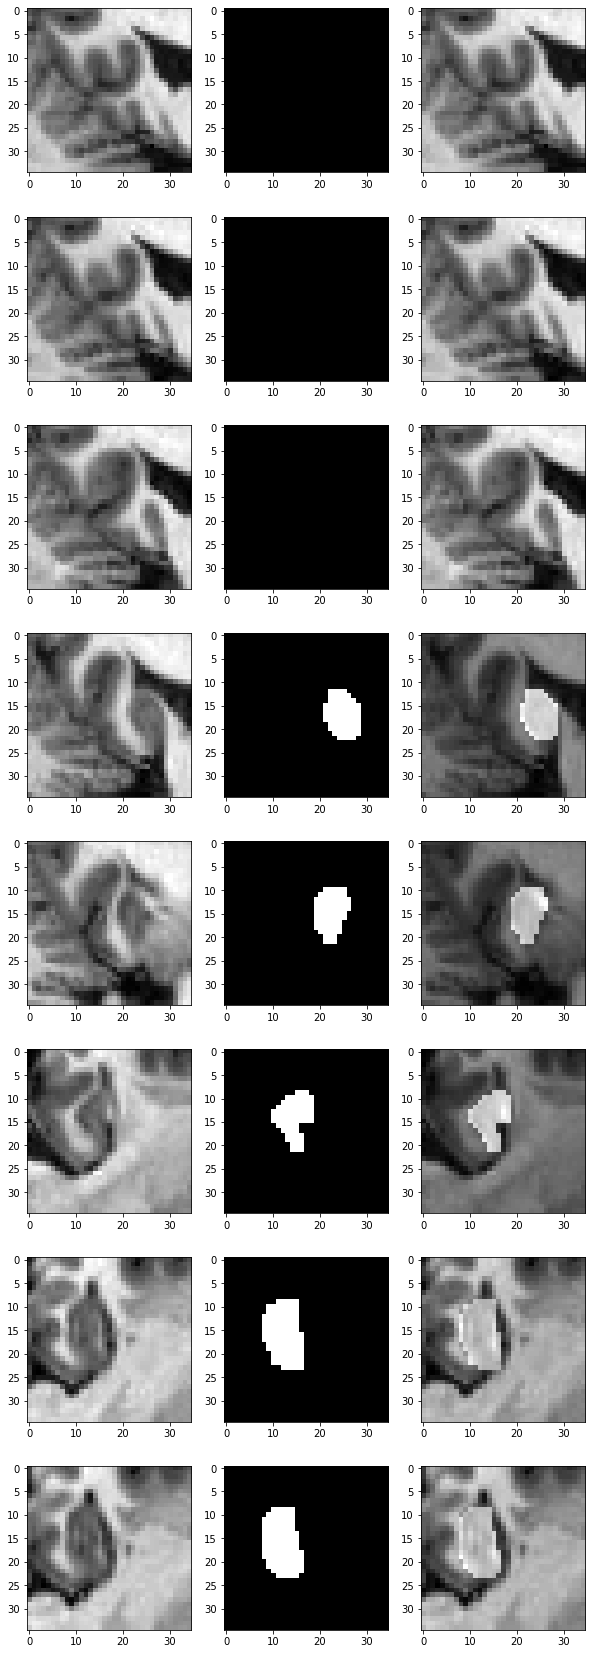

In [5]:
# convert data into ndarray
image_np = image.get_fdata()
label_np = label.get_fdata()

# confirm the shape of the image
print("image has shape: {}".format(image_np.shape))

# select 16 random slice indeces
indeces = random.sample(range(image_np.shape[0]), k = 8)
indeces.sort()
print("showing indeces: {}".format(indeces))

plt.figure(figsize=(10,30))
for i, img_idx in enumerate(indeces):
    plt.subplot(8,3,3*i+1)
    plt.imshow(image_np[:,img_idx,:], cmap = "gray")
    plt.subplot(8,3,3*i+2)
    plt.imshow(label_np[:,img_idx,:], cmap = "gray")
    plt.subplot(8,3,3*i+3)
    plt.imshow(image_np[:,img_idx,:] + label_np[:,img_idx,:]*50, cmap = "gray")

## Looking at meta data

In [6]:
# using .header_class attribute to check the format of images

print(image.header_class)

print("[Answer] It is in NIFTI format")

<class 'nibabel.nifti1.Nifti1Header'>
[Answer] It is in NIFTI format


In [7]:
# how many bits per pixel are used

bitpix = image.header['bitpix']

print("[Answer] Number of bits per pixel = {}".format(bitpix))

[Answer] Number of bits per pixel = 8


In [8]:
# units of measurement

xyzt_units = image.header['xyzt_units']

print("xyzt_units = {}".format(xyzt_units))
print("\n")
print("xyzt_units in binary representation = {}".format(format(xyzt_units, '#010b')))
print("\n")
print("[Answer] The 1-3 bits gives 2, indicating that the spatial unit is in milimeters")
print("\n")
print("[Answer] The 4-6 bit gives 8, indicating that the temporal unit is in seconds")

xyzt_units = 10


xyzt_units in binary representation = 0b00001010


[Answer] The 1-3 bits gives 2, indicating that the spatial unit is in milimeters


[Answer] The 4-6 bit gives 8, indicating that the temporal unit is in seconds


In [9]:
# grid spacings

pixdim = image.header['pixdim']

print("pixdim = {}".format(pixdim))
print("\n")
print("[Answer] The grid is regular. The grid spacing is 1 unit (i.e., 1 milimeter)")

pixdim = [1. 1. 1. 1. 1. 0. 0. 0.]


[Answer] The grid is regular. The grid spacing is 1 unit (i.e., 1 milimeter)


image_np.shape = (35, 51, 35)


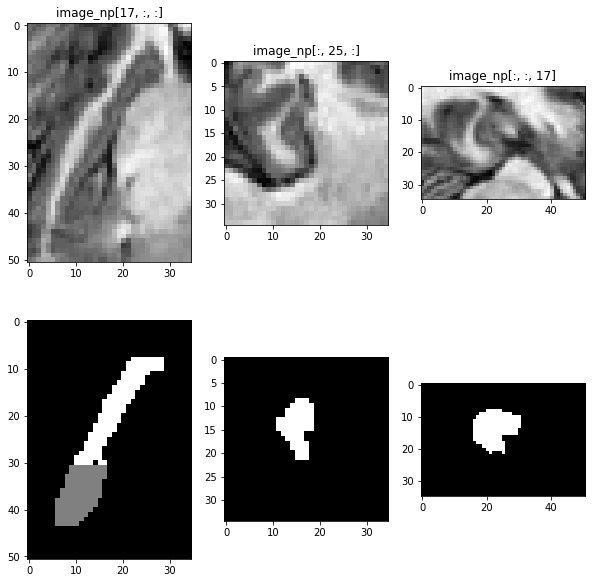

[Answer] NIFTI defines its coordinate system by:


x - sagittal


y - coronal


z - axial




[Answer] Therefore the first dimension image_np[i, :, :] gives a sagittal slice.
The second dimension image_np[:, j, :] gives a coronal slice
The third dimension image_np[:, :, k] gives an axial slice


In [10]:
# dimensions represent axial, sagittal, and coronal slices

print("image_np.shape = {}".format(image_np.shape))

d0, d1, d2 = image_np.shape

fig, [ax1, ax2] = plt.subplots(2, 3, figsize=(10, 10))
# set titles
ax1[0].title.set_text("image_np[{}, :, :]".format(d0//2))
ax1[1].title.set_text("image_np[:, {}, :]".format(d1//2))
ax1[2].title.set_text("image_np[:, :, {}]".format(d2//2))
# images
ax1[0].imshow(image_np[d0//2, :, :], cmap='gray')
ax1[1].imshow(image_np[:, d1//2, :], cmap='gray')
ax1[2].imshow(image_np[:, :, d2//2], cmap='gray')
# labels
ax2[0].imshow(label_np[d0//2, :, :], cmap='gray')
ax2[1].imshow(label_np[:, d1//2, :], cmap='gray')
ax2[2].imshow(label_np[:, :, d2//2], cmap='gray')
plt.show()

print("[Answer] NIFTI defines its coordinate system by:")
print("\n")
print("x - sagittal")
print("\n")
print("y - coronal")
print("\n")
print("z - axial")
print("\n")
print("\n")
print("[Answer] Therefore the first dimension image_np[i, :, :] gives a sagittal slice.")
print("The second dimension image_np[:, j, :] gives a coronal slice")
print("The third dimension image_np[:, :, k] gives an axial slice")

In [11]:
# compute the volume (in mm³) of the hippocampus

# sum up all coronal slices
def calculate_hippocampus_volume(label_matrix):
    res = 0
    for i in range(label_matrix.shape[1]):
        res += np.count_nonzero(label_matrix[:, i, :])
    return res

print("Volume of the hippocampus = {} mm^3".format(calculate_hippocampus_volume(label_np)))

Volume of the hippocampus = 2948 mm^3


## Exploratory data analysis

hippocampus_118.nii.gz not found


Volumes sorted by increasing : [2382, 2397, 2416, 2422, 2448, 2451, 2471, 2475, 2532, 2534]
max volume = 20702


Volumes sorted by decreasing : [20702, 4401, 4383, 4263, 4151, 4074, 4071, 4030, 4029, 4001]
min volume = 2382


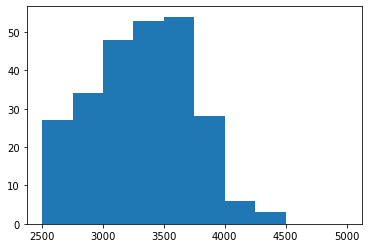



We see that we have incomplete data. We do not have the hile hippocampus_118.nii.gz
We see that there is an outlier with volume = 20702
One possible reason is that this file has different dimensional units
To check this, we load the data again and see its header:


The outlier is hippocampus_281.nii.gz

xyzt_units = 10
pixdim = [1.       0.734375 0.734375 5.       0.       0.       0.       0.      ]
We thus confirmed that the outlier is due to its different grid spacing.


In [12]:
# histogram of all volumes

train_volumes = []

for filename in filenames:
    
    # load the label matrix
    try:
        image_nib = nib.load(os.path.join(f"/data/TrainingSet/images", filename))
        label_nib = nib.load(os.path.join(f"/data/TrainingSet/labels", filename))
    
        # calculate volume and append to train_volumes
        train_volumes.append(calculate_hippocampus_volume(label_nib.get_fdata()))
        
    except FileNotFoundError:
        print("{} not found".format(filename))
    
# print min and max
train_volumes.sort()
print("\n")
print("Volumes sorted by increasing : {}".format(train_volumes[:10]))
print("max volume = {}".format(max(train_volumes)))
print("\n")
train_volumes.sort(reverse=True)
print("Volumes sorted by decreasing : {}".format(train_volumes[:10]))
print("min volume = {}".format(min(train_volumes)))

# plot the histogram
plt.hist(train_volumes, range = (2500, 5000))
plt.show()

print("\n")
print("We see that we have incomplete data. We do not have the hile hippocampus_118.nii.gz")
print("We see that there is an outlier with volume = 20702")
print("One possible reason is that this file has different dimensional units")
print("To check this, we load the data again and see its header:\n")


# clean datasets
clean_filenames = []

# load data again to find the outlier
for filename in filenames:
    
    # load the label matrix
    try:
        image_nib = nib.load(os.path.join(f"/data/TrainingSet/images", filename))
        label_nib = nib.load(os.path.join(f"/data/TrainingSet/labels", filename))
    
        # calculate volume and append to train_volumes
        if calculate_hippocampus_volume(label_nib.get_fdata()) == 20702:
            print("The outlier is {}\n".format(filename))
            print("xyzt_units = {}".format(label_nib.header['xyzt_units']))
            print("pixdim = {}".format(label_nib.header['pixdim']))
        else:
            clean_filenames.append(filename)
        
    except FileNotFoundError:
        print("")

print("We thus confirmed that the outlier is due to its different grid spacing.")

I also identified an outlier based on the size of the image. From the cell below we see that **hippocampus_010.nii.gz** as a shape that is far different from all other files. We will therefore exclude **hippocampus_010.nii.gz** from the dataset.

In [13]:
# list to store the final datasets
final_filenames = []

# load data again to find the outlier
for filename in clean_filenames:
    
    # load the label matrix
    image_nib = nib.load(os.path.join(f"/data/TrainingSet/images", filename))

    # shape of the input image
    print("{}: {}".format(filename, image_nib.shape))
    
    final_filenames.append(filename)

hippocampus_001.nii.gz: (35, 51, 35)
hippocampus_003.nii.gz: (34, 52, 35)
hippocampus_004.nii.gz: (36, 52, 38)
hippocampus_006.nii.gz: (35, 52, 34)
hippocampus_007.nii.gz: (34, 47, 40)
hippocampus_008.nii.gz: (36, 48, 40)
hippocampus_010.nii.gz: (512, 512, 241)
hippocampus_011.nii.gz: (36, 50, 31)
hippocampus_014.nii.gz: (39, 50, 40)
hippocampus_015.nii.gz: (42, 51, 28)
hippocampus_017.nii.gz: (35, 48, 32)
hippocampus_019.nii.gz: (36, 47, 41)
hippocampus_020.nii.gz: (36, 46, 43)
hippocampus_023.nii.gz: (35, 51, 35)
hippocampus_024.nii.gz: (38, 52, 33)
hippocampus_025.nii.gz: (35, 48, 35)
hippocampus_026.nii.gz: (36, 50, 36)
hippocampus_033.nii.gz: (33, 48, 38)
hippocampus_034.nii.gz: (36, 49, 40)
hippocampus_035.nii.gz: (35, 47, 37)
hippocampus_036.nii.gz: (36, 47, 39)
hippocampus_037.nii.gz: (34, 51, 32)
hippocampus_038.nii.gz: (37, 51, 35)
hippocampus_039.nii.gz: (34, 53, 34)
hippocampus_040.nii.gz: (36, 52, 37)
hippocampus_041.nii.gz: (36, 51, 34)
hippocampus_042.nii.gz: (37, 52, 34

To sum up, we removed 3 files from the datasets:

**hippocampus_118.nii.gz** is removed because label data is missing

**hippocampus_281.nii.gz** is removed because it's grid spacing is different (resulting in different total volume of hippocampus)

**hippocampus_010.nii.gz** is removed because the image shape is different.

In [14]:
os.path.exists(f"out")

True

In [15]:
clean_filenames = list(final_filenames)

In [16]:
# clean dataset to the output folder

print("Number of clean datasets = {}".format(len(clean_filenames)))

## moving files
import shutil

if not os.path.exists(f"out/images"):
    os.mkdir(f"out/images")
    print("out/images created")

if not os.path.exists(f"out/labels"):
    os.mkdir(f"out/labels")
    print("out/labels created")
    
for filename in clean_filenames:
    
    # image and label sources
    src_image = os.path.join(f"/data/TrainingSet/images", filename)
    src_label = os.path.join(f"/data/TrainingSet/labels", filename)
    
    # image and label destinatios
    dst_image = os.path.join(f"out/images", filename)
    dst_label = os.path.join(f"out/labels", filename)
    
    # copy image files
    shutil.copy(src_image, dst_image)
    
    # copy label files
    shutil.copy(src_label, dst_label)


Number of clean datasets = 261
out/images created
out/labels created


In [17]:
%ls out/images

hippocampus_001.nii.gz  hippocampus_145.nii.gz  hippocampus_274.nii.gz
hippocampus_003.nii.gz  hippocampus_146.nii.gz  hippocampus_276.nii.gz
hippocampus_004.nii.gz  hippocampus_148.nii.gz  hippocampus_277.nii.gz
hippocampus_006.nii.gz  hippocampus_149.nii.gz  hippocampus_279.nii.gz
hippocampus_007.nii.gz  hippocampus_150.nii.gz  hippocampus_280.nii.gz
hippocampus_008.nii.gz  hippocampus_152.nii.gz  hippocampus_282.nii.gz
hippocampus_010.nii.gz  hippocampus_154.nii.gz  hippocampus_286.nii.gz
hippocampus_011.nii.gz  hippocampus_155.nii.gz  hippocampus_287.nii.gz
hippocampus_014.nii.gz  hippocampus_156.nii.gz  hippocampus_288.nii.gz
hippocampus_015.nii.gz  hippocampus_157.nii.gz  hippocampus_289.nii.gz
hippocampus_017.nii.gz  hippocampus_158.nii.gz  hippocampus_290.nii.gz
hippocampus_019.nii.gz  hippocampus_160.nii.gz  hippocampus_292.nii.gz
hippocampus_020.nii.gz  hippocampus_161.nii.gz  hippocampus_294.nii.gz
hippocampus_023.nii.gz  hippocampus_162.nii.gz  hippocampus_295.nii.gz
hippoc

In [18]:
%ls out/labels

hippocampus_001.nii.gz  hippocampus_145.nii.gz  hippocampus_274.nii.gz
hippocampus_003.nii.gz  hippocampus_146.nii.gz  hippocampus_276.nii.gz
hippocampus_004.nii.gz  hippocampus_148.nii.gz  hippocampus_277.nii.gz
hippocampus_006.nii.gz  hippocampus_149.nii.gz  hippocampus_279.nii.gz
hippocampus_007.nii.gz  hippocampus_150.nii.gz  hippocampus_280.nii.gz
hippocampus_008.nii.gz  hippocampus_152.nii.gz  hippocampus_282.nii.gz
hippocampus_010.nii.gz  hippocampus_154.nii.gz  hippocampus_286.nii.gz
hippocampus_011.nii.gz  hippocampus_155.nii.gz  hippocampus_287.nii.gz
hippocampus_014.nii.gz  hippocampus_156.nii.gz  hippocampus_288.nii.gz
hippocampus_015.nii.gz  hippocampus_157.nii.gz  hippocampus_289.nii.gz
hippocampus_017.nii.gz  hippocampus_158.nii.gz  hippocampus_290.nii.gz
hippocampus_019.nii.gz  hippocampus_160.nii.gz  hippocampus_292.nii.gz
hippocampus_020.nii.gz  hippocampus_161.nii.gz  hippocampus_294.nii.gz
hippocampus_023.nii.gz  hippocampus_162.nii.gz  hippocampus_295.nii.gz
hippoc